___
# MINIPROJETO 1

## <font color='red'>JOSE FERNANDO DE MELO CRUZ</font>
___

## <font color='blue'>NOME DA VARIÁVEL QUANTITATIVA ESCOLHIDA</font>

___
### Itens 1 a 3 - Resolução:

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import exponpow
from scipy.stats import beta
from numpy import linspace

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jose Fernando\Documents\GitHub\CD\mini projeto


In [23]:
dados = pd.read_excel("Pasta.xlsx", sep=",")

In [24]:
dados

,ano,nitrogenio,fosfato,potassio
0,1960,2738.0,2572.4,2153.3
1,1961,3030.8,2645.1,2168.5
2,1962,3370.0,2807.0,2270.5
3,1963,3929.1,3072.9,2503.4
4,1964,4352.8,3377.8,2729.7
5,1965,4638.5,3512.2,2834.5
6,1966,5326.3,3897.1,3221.2
7,1967,6027.1,4304.7,3641.8
8,1968,6787.6,4453.3,3792.6
9,1969,6957.6,4665.6,3891.6


In [155]:
tempos = pd.Series(data=sorted(dados.nitrogenio))

In [25]:
dados.nitrogenio.describe()

count       52.000000
mean      9865.990385
std       2928.591468
min       2738.000000
25%       8254.725000
50%      11029.550000
75%      12055.875000
max      13194.400000
Name: nitrogenio, dtype: float64

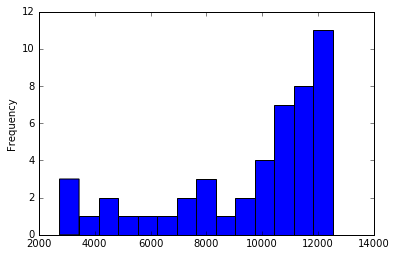

In [40]:
faixa = np.arange(2738,13194,700)
dados.nitrogenio.plot(kind='hist', bins=faixa, normed=0, legend=False)

___
### Itens 4 a 6 - Resolução:

o histograma descrito possui simetria a esquerda 

distribuição exponpow e beta

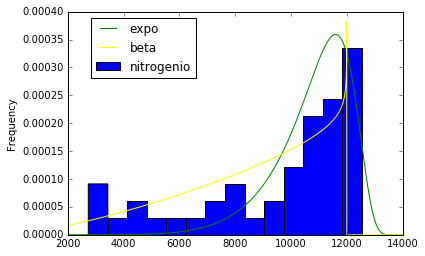

In [115]:
media = dados.nitrogenio.mean()
a = 0.92
k_gama = 2.3
b = 8
teta_gama = media/k_gama
x = linspace(2000,14000,10000)

dados.nitrogenio.plot(kind='hist', bins=faixa, normed=True, legend=False)
expo = stats.exponpow.pdf(x, b, scale=12000, loc=0)
beta = stats.beta.pdf(x, k_gama, a, scale=12000, loc=1)

plt.plot(x,expo, '-', color='green', label="expo")
plt.plot(x,beta, '-', color='yellow', label="beta")

plt.legend(bbox_to_anchor=(0.4,1))

# .fit

In [148]:
print(stats.beta.fit(dados.nitrogenio))
print()
print(stats.exponpow.fit(dados.nitrogenio))

(1.0943141616649659, 0.36971002139568881, 1721.5430069787658, 11472.856993021236)

(1.0, 1692.3599999999999, 1.0)


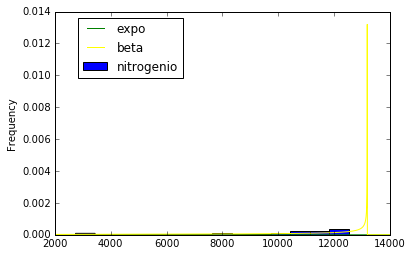

In [153]:
media = dados.nitrogenio.mean()
a = 0.36971002139568881
k_gama =1.0943141616649659
b = 1
teta_gama = media/k_gama
x = linspace(2000,14000,10000)

dados.nitrogenio.plot(kind='hist', bins=faixa, normed=True, legend=False)
beta = stats.beta.pdf(x, k_gama, a, scale=11472.856993021236, loc=1721.5430069787658)
expo = stats.exponpow.pdf(x, b, scale=1, loc=0)

plt.plot(x,expo, '-', color='green', label="expo")
plt.plot(x,beta, '-', color='yellow', label="beta")

plt.legend(bbox_to_anchor=(0.4,1))

# q-q plot
usando dados estimados

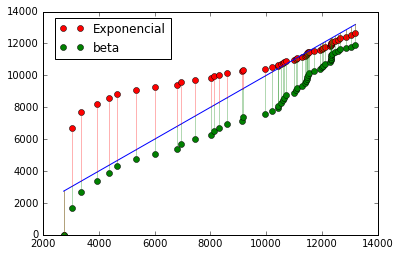

In [166]:
media = dados.nitrogenio.mean()
var = dados.nitrogenio.std()
a = 0.92
k_gama = 2.3
b = 8
teta_gama = media/k_gama
x = linspace(2000,14000,10000)

fra = [] # frequencia relativa acumulada
for i in range(len(tempos)):
    acc = (i - 0.5) / len(tempos)
    if acc < 0:
        acc = 0
    fra.append(acc)
    
fra = pd.Series(data=fra)

q_exp = stats.exponpow.ppf(fra, b, scale=12000, loc=0) # quantis teóricos da exponencial
q_gamma = stats.beta.ppf(fra, k_gama, a, scale=12000, loc=0)

exp_plot, = plt.plot(tempos, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(tempos, q_gamma, 'o', color="green", label = "beta")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_exp[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_gamma[i], tempos[i]), '-', color='green', alpha=0.3  )

plt.legend(bbox_to_anchor=(0.4,1))

___
### Itens 7 a 9 - Resolução:

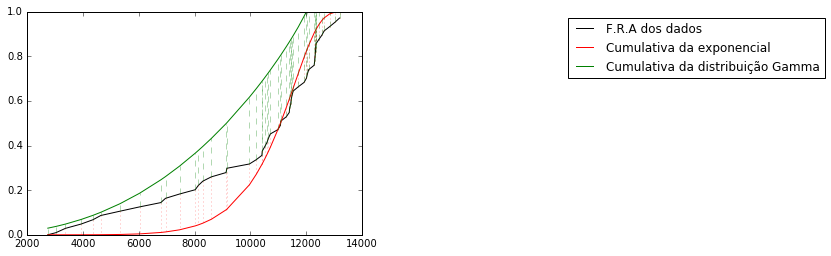

In [176]:
cdf_exponencial = stats.exponpow.cdf(tempos, b, scale=12000, loc=0) #FDA
cdf_gamma = stats.beta.cdf(tempos, k_gama, a, scale=12000, loc=0)

dados_fra_plot, = plt.plot(tempos, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(tempos, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot],bbox_to_anchor=(2.4,1))

for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

___
### Itens 10 e 11 - Resolução:

In [183]:
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da beta versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da Exponencial versus F.R.A 0.483219534205
Erro quadrático da CDF da beta versus F.R.A 2.51694845805


In [178]:
# Diferenças absolutas
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 4.185820964919304 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 10.015687848926971


In [187]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a beta com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(media, ks_aderencia_exp, teta_gama, k_gama, ks_aderencia_gamma))

Teste K-S para a exponencial com μ= 9865.99: 0.190
Teste K-S para a beta com scale=4289.561, loc=0 e a=2.300  0.331:


In [188]:
print(np.mean(q_gamma)), print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print()
print(np.mean(q_exp)), print("Erro quadrático da CDF da beta versus F.R.A", erro_quad_cdf_gamma)

8343.89059234
Erro quadrático da CDF da Exponencial versus F.R.A 0.483219534205

10575.2493174
Erro quadrático da CDF da beta versus F.R.A 2.51694845805


(None, None)

podemos concluir que o erro da exponencial é menor que a beta.